In [66]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load dataset
df = pd.read_csv("NFLX.csv")

# Display first 5 rows
df.head()


,Date,Open,High,Low,Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,16906900


In [68]:
# Check dataset shape (rows, columns)
df.shape


(1009, 6)

In [69]:
# Check dataset info (columns, datatypes, non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


In [70]:
# Check null values in each column
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [71]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Set Date as index
df.set_index('Date', inplace=True)

# Show first 5 rows after cleaning
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


**EDA Start here **


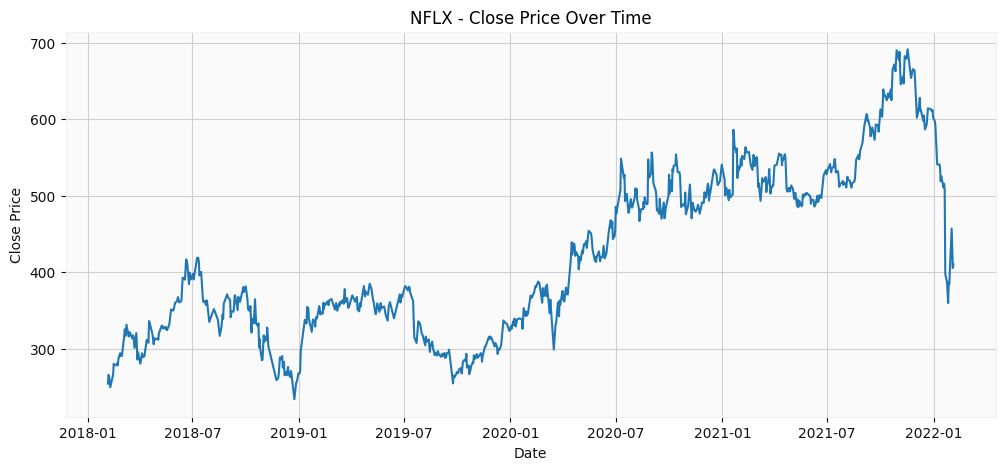

In [72]:
# Close price trend
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.title("NFLX - Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


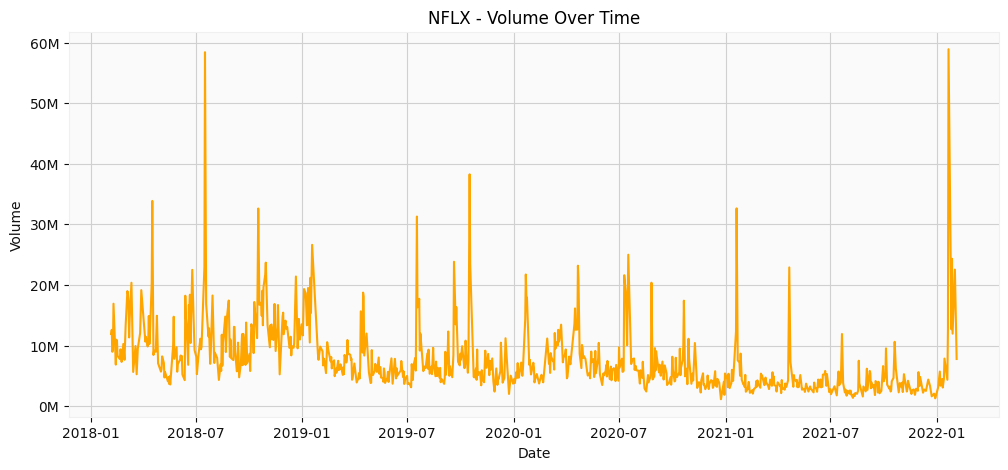

In [73]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Volume'], color="orange")
plt.title("NFLX - Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")

# Y-axis ko human readable format me dikhana
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

plt.show()



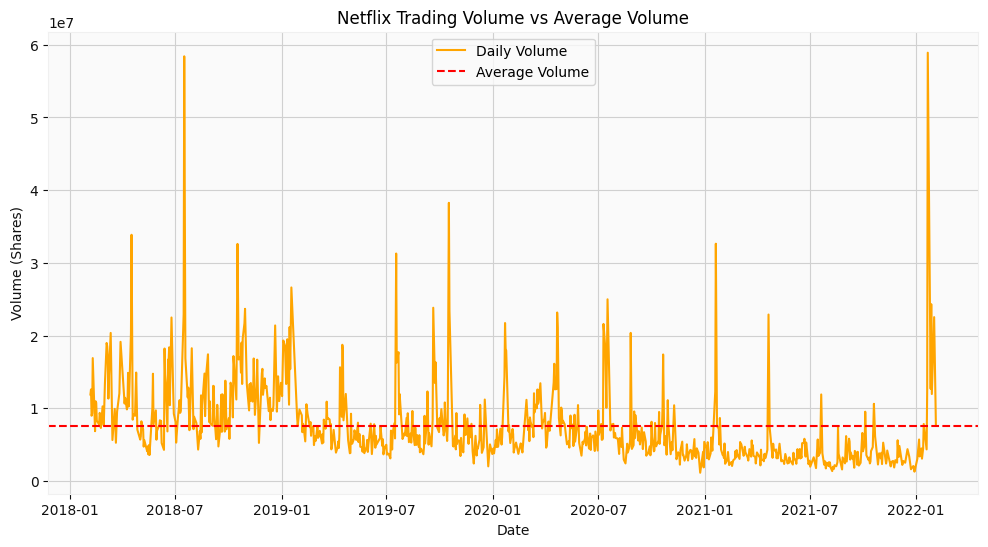

In [74]:
# Calculate average volume
avg_volume = df['Volume'].mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Volume'], color='orange', label='Daily Volume')
plt.axhline(y=avg_volume, color='red', linestyle='--', label='Average Volume')

plt.title("Netflix Trading Volume vs Average Volume")
plt.xlabel("Date")
plt.ylabel("Volume (Shares)")
plt.legend()
plt.show()


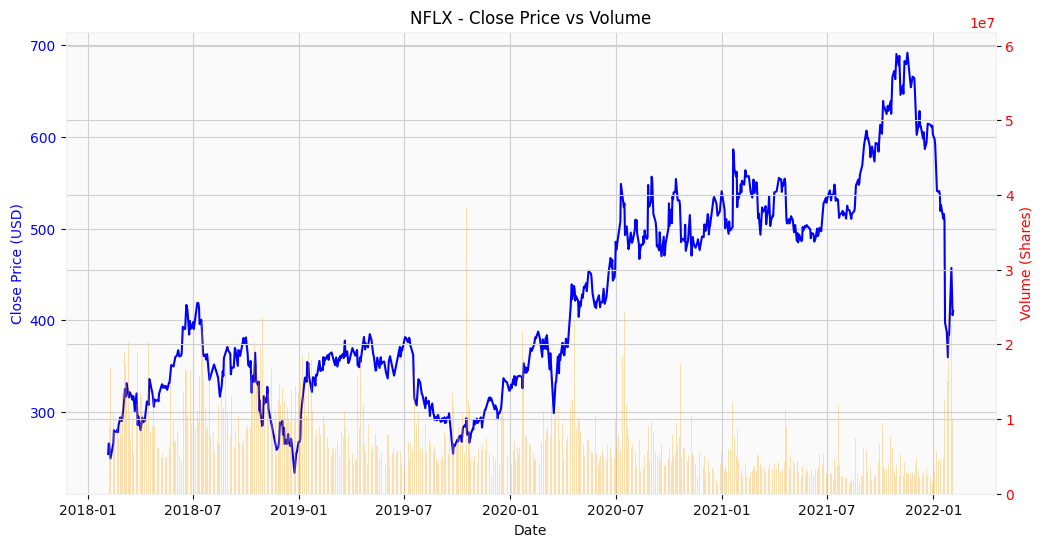

In [75]:
# Close Price vs Volume Overlay

fig, ax1 = plt.subplots(figsize=(12,6))

# Close Price line (left y-axis)
ax1.plot(df.index, df['Close'], color='blue', label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Volume bar chart (right y-axis)
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='orange', alpha=0.3, label='Volume')
ax2.set_ylabel("Volume (Shares)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title("NFLX - Close Price vs Volume")

plt.show()


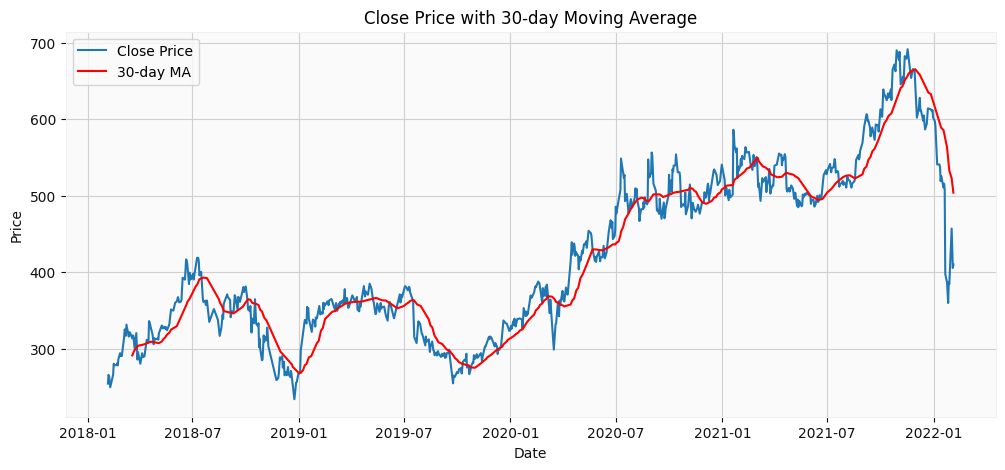

In [76]:
# Add 30-day Moving Average
df['MA30'] = df['Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'], label="Close Price")
plt.plot(df.index, df['MA30'], label="30-day MA", color="red")
plt.title("Close Price with 30-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


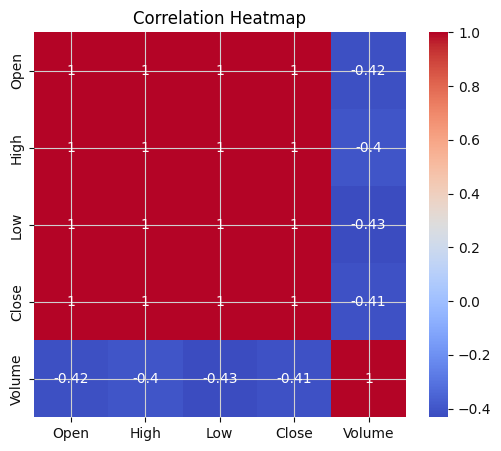

In [77]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


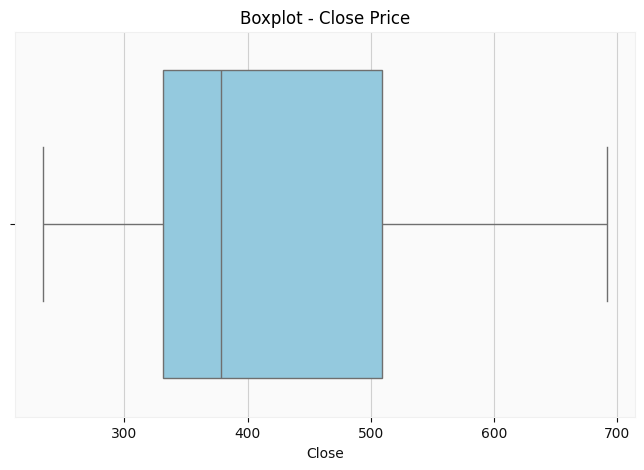

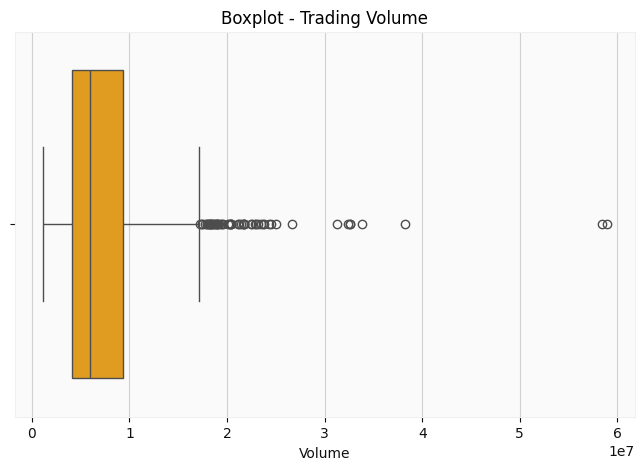

In [78]:
# Boxplots for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Close'], color="skyblue")
plt.title("Boxplot - Close Price")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Volume'], color="orange")
plt.title("Boxplot - Trading Volume")
plt.show()


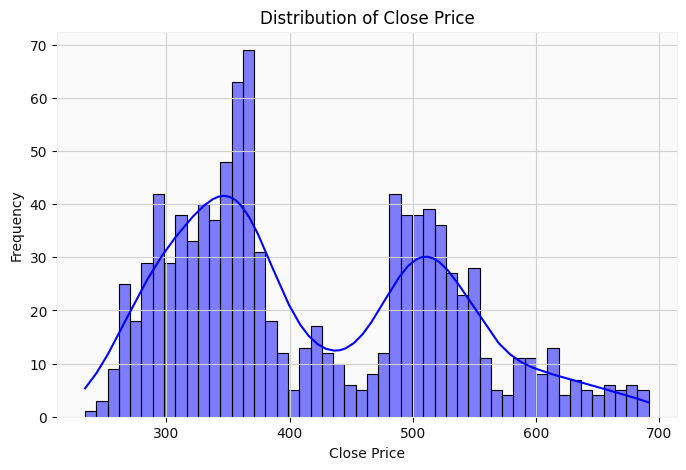

In [79]:
# Distribution of Close Price
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=50, kde=True, color="blue")
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


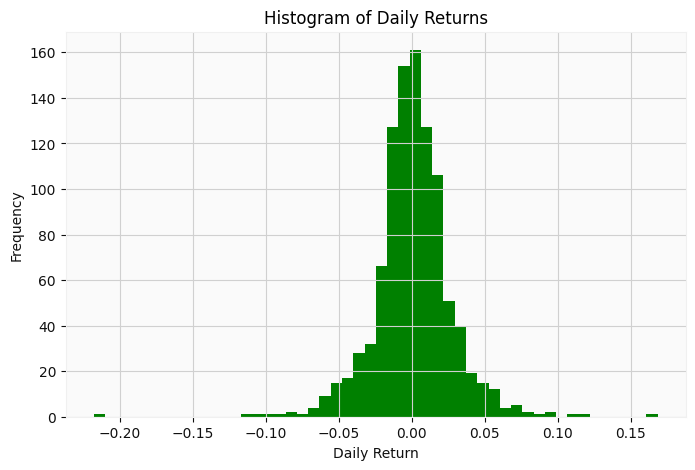

,Return
count,1008.000000
mean,0.000831
std,0.026603
min,-0.217905
25%,-0.011933
50%,0.000673
75%,0.014544
max,0.168543


In [80]:
# Daily returns
df['Return'] = df['Close'].pct_change()

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df['Return'].dropna(), bins=50, color="green")
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Summary stats
df['Return'].describe()


/tmp/ipython-input-235418751.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


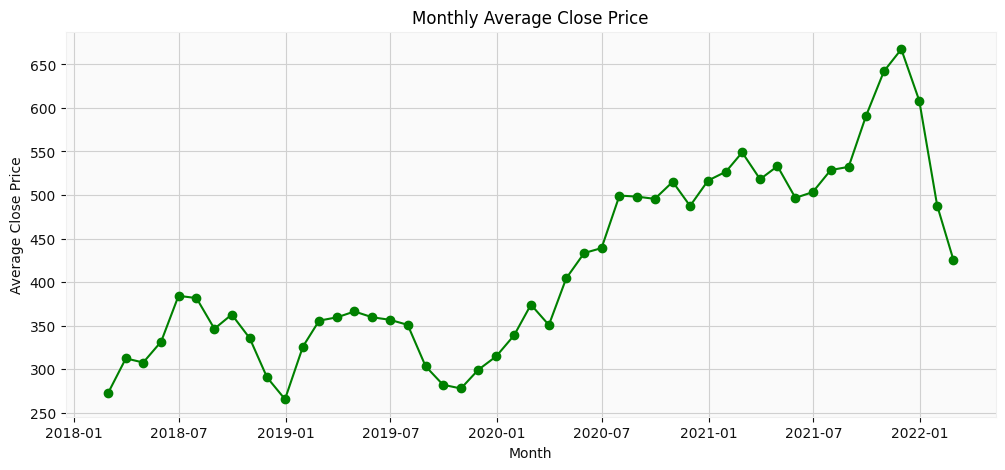

In [81]:
# Monthly Average Close Price
monthly_avg = df['Close'].resample('M').mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_avg, marker='o', color="green")
plt.title("Monthly Average Close Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.show()


/tmp/ipython-input-3083255869.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_return = df['Return'].resample('M').mean()


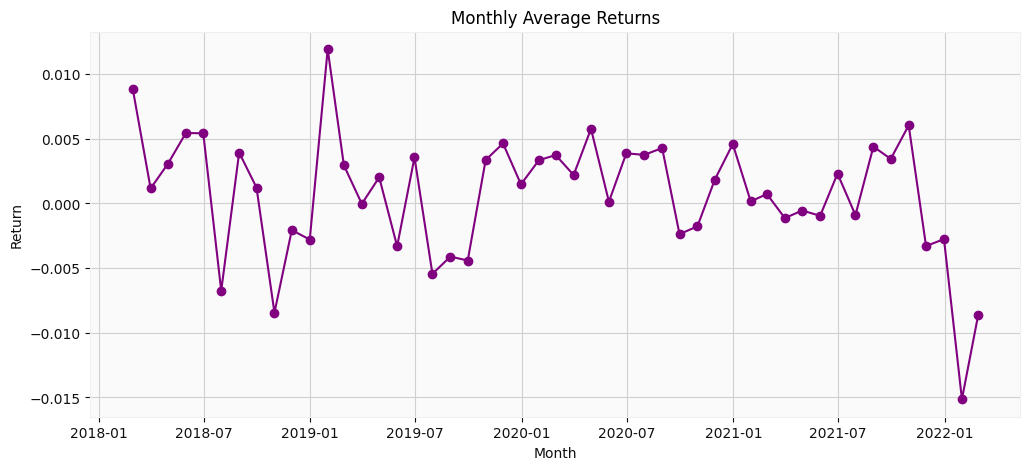

In [82]:
# Monthly Returns
monthly_return = df['Return'].resample('M').mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_return, marker='o', color="purple")
plt.title("Monthly Average Returns")
plt.xlabel("Month")
plt.ylabel("Return")
plt.show()


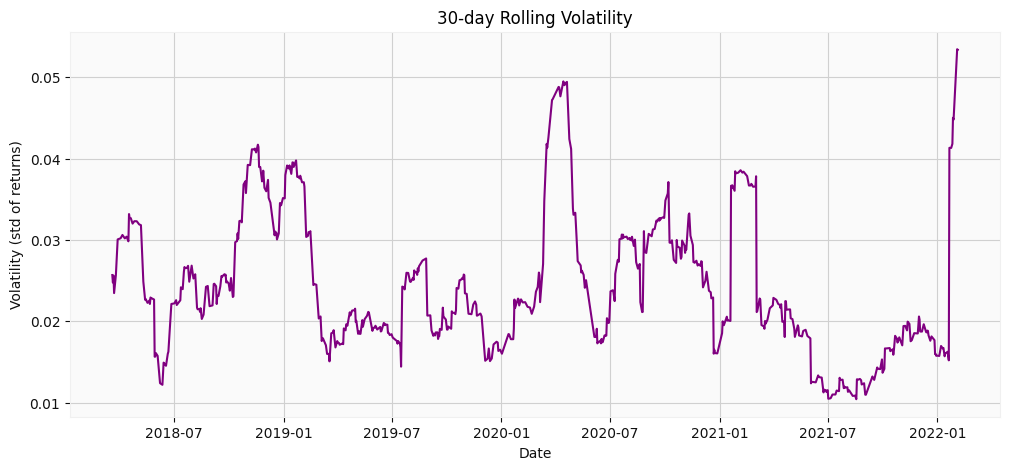

📈 Maximum Volatility: 0.0534 on 2022-02-03
📉 Minimum Volatility: 0.0104 on 2021-08-18


In [83]:
# 30-day rolling volatility
df['Volatility'] = df['Return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Volatility'], color="purple")
plt.title("30-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.show()

# Find max and min volatility
max_vol = df['Volatility'].max()
min_vol = df['Volatility'].min()

max_vol_date = df['Volatility'].idxmax()
min_vol_date = df['Volatility'].idxmin()

print(f"📈 Maximum Volatility: {max_vol:.4f} on {max_vol_date.date()}")
print(f"📉 Minimum Volatility: {min_vol:.4f} on {min_vol_date.date()}")


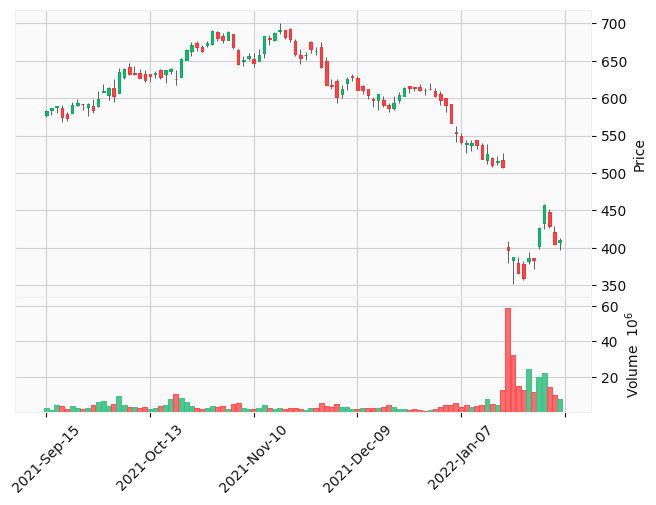

In [84]:
import mplfinance as mpf

# Last 100 days candlestick chart
mpf.plot(df.tail(100), type='candle', volume=True, style='yahoo')


In [85]:
!pip install mplfinance

In [86]:
      #LINEAR REGRESSSION MODEL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [87]:
X = df[['Open', 'High', 'Low', 'Volume']]  # independent variables
y = df['Close']  # dependent variable (target)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [89]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [90]:
y_pred = model.predict(X_test)


In [91]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 17.25720837610156
RMSE: 4.154179627327345
R² Score: 0.9965159161611913


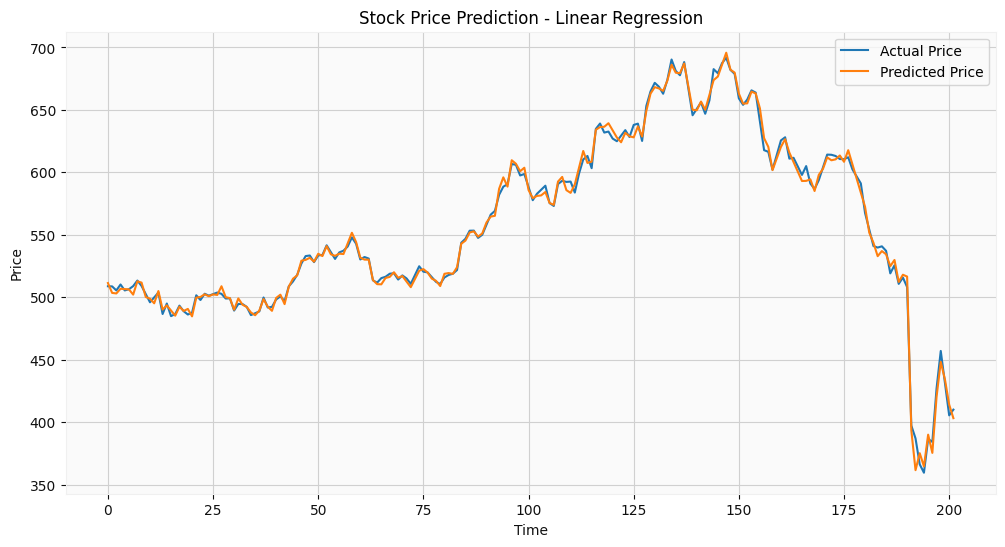

In [92]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [93]:
import joblib

# Save the trained Linear Regression model
joblib.dump(model, "linear_regression_model.pkl")
print("✅ Linear Regression model saved as linear_regression_model.pkl")

# Load the saved model
loaded_lr = joblib.load("linear_regression_model.pkl")
print("✅ Linear Regression model loaded successfully")

# Example: predict with loaded model
print("Sample Predictions (Linear Regression):", loaded_lr.predict(X_test[:5]))


✅ Linear Regression model saved as linear_regression_model.pkl
✅ Linear Regression model loaded successfully
Sample Predictions (Linear Regression): [511.47317992 503.57009194 503.14682791 506.87731884 506.55096712]


In [94]:
       #LSTM MODEL IMPLEMENTATION

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [95]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))


In [96]:
training_data_len = int(len(scaled_data) * 0.8)

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [97]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [98]:
model.fit(x_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0903
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0049
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0023
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0021
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0021
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0019
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0018
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019


In [99]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = df['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [100]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [101]:
rmse = math.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 29.238656147838643
R² Score: 0.827403148223743


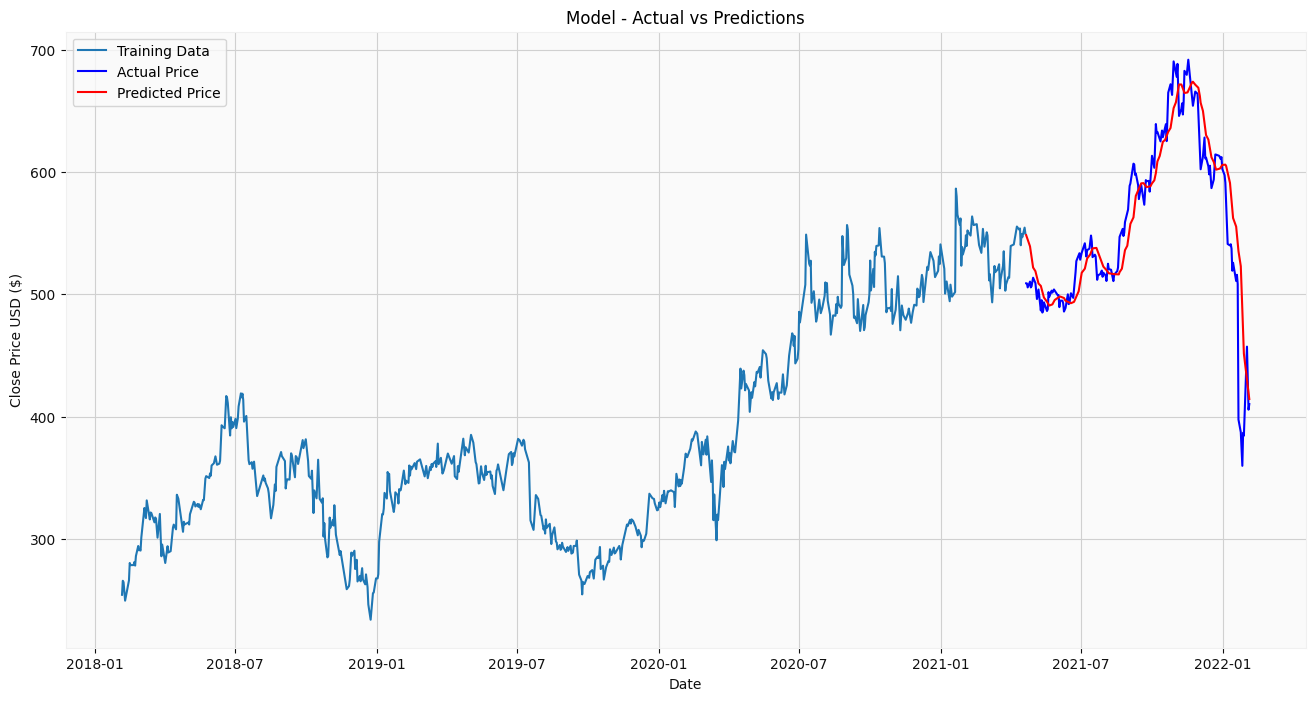

,Open,High,Low,Close,Volume,MA30,Return,Volatility,Predictions
Date,,,,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,527.323000,0.111302,0.050226,435.965851
2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,523.003001,0.070211,0.052291,425.327759
2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,517.527668,-0.060486,0.053060,420.075684
2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,510.883669,-0.055602,0.053439,417.044189
2022-02-04,407.309998,412.769989,396.640015,410.170013,7782400,504.081336,0.011267,0.053372,414.295563


In [102]:
# Compare predicted vs actual values
train = df[:training_data_len]
valid = df[training_data_len:]

# Add predictions column safely
valid = valid.copy()
valid.loc[:, 'Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16,8))
plt.title("Model - Actual vs Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price', color='blue')
plt.plot(valid['Predictions'], label='Predicted Price', color='red')
plt.legend()
plt.show()

# Show actual vs predicted values (last few rows)
valid.tail()


            Predicted Price
Date                       
2022-02-07       807.359680
2022-02-08       818.834106
2022-02-09       820.647522
2022-02-10       758.190674
2022-02-11       469.766937
2022-02-14       449.032532
2022-02-15       414.953583
2022-02-16       373.048584
2022-02-17       333.401276
2022-02-18       321.615295
2022-02-21       309.363129
2022-02-22       298.989807
2022-02-23       291.862823
2022-02-24       288.055420
2022-02-25       284.858246
2022-02-28       282.519348
2022-03-01       280.968872
2022-03-02       279.952759
2022-03-03       279.185974
2022-03-04       278.650574
2022-03-07       278.287567
2022-03-08       278.036041
2022-03-09       277.855286
2022-03-10       277.730164
2022-03-11       277.643738
2022-03-14       277.583252
2022-03-15       277.540619
2022-03-16       277.511078
2022-03-17       277.490479
2022-03-18       277.476044


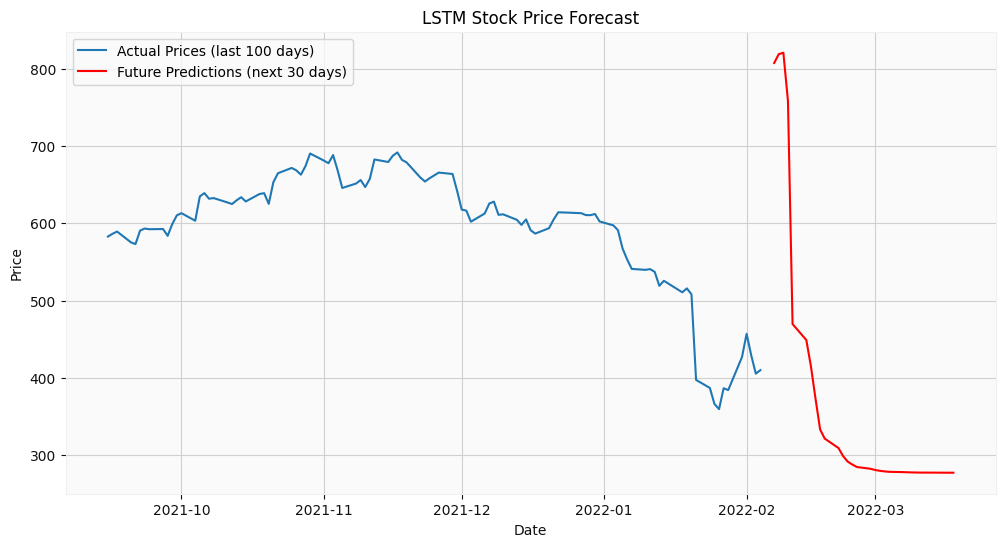

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Future prediction length (e.g., 30 days)
future_days = 30

# Last sequence from test data
last_sequence = X_test.iloc[-1] # Use .iloc[-1] to get the last row

# Make future predictions
future_predictions = []
X_future = last_sequence.values.reshape(1, last_sequence.shape[0], 1) # Reshape to (1, n_features, 1) for LSTM

for _ in range(future_days):
    pred_price = model.predict(X_future, verbose=0) # Add verbose=0 to suppress output

    future_predictions.append(pred_price[0,0])

    # Update sequence (remove first, append new)
    new_input = np.append(X_future[0,1:,0], pred_price[0,0])
    X_future = new_input.reshape(1, new_input.shape[0], 1)

# Inverse transform predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

# Create dates for future predictions
last_date = df.index[-1] # Use df instead of data
future_dates = pd.date_range(last_date, periods=future_days+1, freq="B")[1:]  # Business days

# Create DataFrame
future_df = pd.DataFrame({"Date": future_dates, "Predicted Price": future_predictions.flatten()})
future_df.set_index("Date", inplace=True)

# Show DataFrame
print(future_df)

# Plot actual + predicted
plt.figure(figsize=(12,6))
plt.plot(df.index[-100:], df["Close"][-100:], label="Actual Prices (last 100 days)") # Use df instead of data
plt.plot(future_df.index, future_df["Predicted Price"], color="red", label="Future Predictions (next 30 days)")
plt.title("LSTM Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression metrics
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

# LSTM metrics
mse_lstm = mean_squared_error(y_test, predictions)
mae_lstm = mean_absolute_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, predictions)

# Comparison Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "LSTM"],
    "MSE": [mse_lr, mse_lstm],
    "RMSE": [rmse_lr, rmse_lstm],
    "MAE": [mae_lr, mae_lstm],
    "R² Score": [r2_lr, r2_lstm]
})

print("📊 Model Comparison:")
display(results)

📊 Model Comparison:


,Model,MSE,RMSE,MAE,R² Score
0,Linear Regression,17.257208,4.154180,3.051103,0.996516
1,LSTM,854.899013,29.238656,19.846368,0.827403


In [105]:
# ✅ Save in latest Keras format
model.save("lstm_model.keras")
print("✅ LSTM model saved as lstm_model.keras")


✅ LSTM model saved as lstm_model.keras


In [106]:
from tensorflow.keras.models import load_model

# ✅ Load model (no warnings)
loaded_model = load_model("lstm_model.keras")
print("✅ LSTM model loaded successfully")

# Example: make predictions again
sample_preds = loaded_model.predict(x_test[:5])
print("📊 Sample Predictions (LSTM):")
print(sample_preds)


✅ LSTM model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
📊 Sample Predictions (LSTM):
[[0.68681437]
 [0.6832348 ]
 [0.6761326 ]
 [0.6667182 ]
 [0.6569445 ]]


            **Evaluate & Compare Saved Models**

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step

📊 Model Comparison Results:

               Model         MSE       RMSE        MAE  R² Score
0  Linear Regression   17.257208   4.154180   3.051103  0.996516
1               LSTM  854.899013  29.238656  19.846368  0.827403


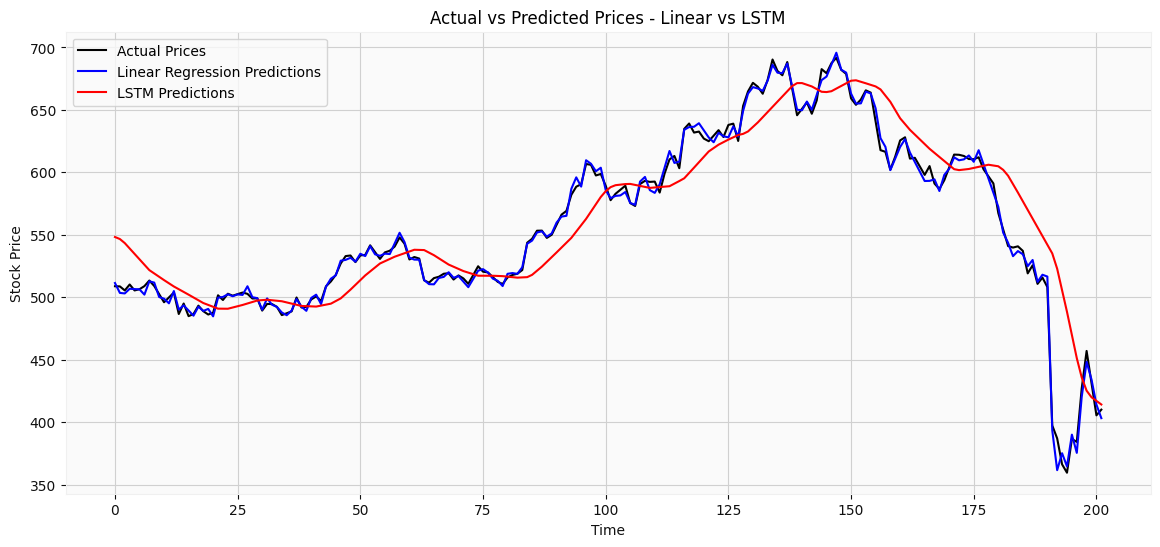

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("NFLX.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# -----------------------------
# 2. Prepare features & target
# -----------------------------
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -----------------------------
# 3. Load Linear Regression Model
# -----------------------------
linear_model = joblib.load("linear_regression_model.pkl")
y_pred_lr = linear_model.predict(X_test)

# -----------------------------
# 4. Load LSTM Model
# -----------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Prepare test set for LSTM
test_data = scaled_data[split-60:]
x_test_lstm, y_test_lstm = [], df['Close'][split:].values
for i in range(60, len(test_data)):
    x_test_lstm.append(test_data[i-60:i, 0])
x_test_lstm = np.array(x_test_lstm).reshape(-1, 60, 1)

# Load saved LSTM model
lstm_model = load_model("lstm_model.keras")
y_pred_lstm = lstm_model.predict(x_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
results = pd.DataFrame({
    "Model": ["Linear Regression", "LSTM"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test_lstm, y_pred_lstm)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test_lstm, y_pred_lstm)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test_lstm, y_pred_lstm)
    ]
})

print("\n📊 Model Comparison Results:\n")
print(results)

# -----------------------------
# 6. Plot Comparison
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Prices", color="black")
plt.plot(y_pred_lr,  label="Linear Regression Predictions", color="blue")
plt.plot(y_pred_lstm, label="LSTM Predictions", color="red")
plt.title("Actual vs Predicted Prices - Linear vs LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()